# PART 3: CNN

**_TABLE OF CONTENT_**
     0. General Functions
     1. AAPL
        1.1 Train and test set size
        1.2 CNN
     2. AMZN
     3. GOOG
     4. FB
     5. NFLX

In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import display
from keras.models import Sequential
from keras.layers import Dense, RepeatVector, Flatten, TimeDistributed, LSTM, Dropout
from preprocessing import create_basetable
from keras.layers.convolutional import Conv1D, MaxPooling1D
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from datetime import date

from helpFunctions import *

## 0. General functions

In [2]:
start_independent = date(2020, 3, 22)
end_independent= date(2020, 11, 30)
start_dependent = date(2020, 12, 1)

In [3]:
def CNNClassifier(x_train, x_test, y_train, y_test):

    # Shape testing data
    df_for_testing_scaled = pd.merge(pd.DataFrame(y_test).reset_index(drop=True),
                                 pd.DataFrame(x_test).reset_index(drop=True),
                                 how='inner',
                                 left_index=True,
                                 right_index=True)
    df_for_testing_scaled = np.array(df_for_testing_scaled)
    testX = []
    testY = []
    n_future = 1   # Number of days we want to predict into the future
    n_past = 14     # Number of past days we want to use to predict the future
    for i in range(n_past, len(df_for_testing_scaled) - n_future +1):
        testX.append(df_for_testing_scaled[i - n_past:i, 0:df_for_testing_scaled.shape[1]])
        testY.append(df_for_testing_scaled[i + n_future - 1:i + n_future, 0])
    testX, testY = np.array(testX), np.array(testY)


    # Shape training data
    df_for_training_scaled = pd.merge(pd.DataFrame(y_train).reset_index(drop=True),
                                     pd.DataFrame(x_train).reset_index(drop=True),
                                     how='inner',
                                     left_index=True,
                                     right_index=True)
    df_for_training_scaled = np.array(df_for_training_scaled)
    trainX = []
    trainY = []
    for i in range(n_past, len(df_for_training_scaled) - n_future +1):
        trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training_scaled.shape[1]])
        trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainX, trainY = np.array(trainX), np.array(trainY)

    # define CNN model
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu',input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # fit model
    model.fit(trainX, trainY, epochs=1000, verbose=0)
    # plt.plot(history.history['loss'], label='Training loss')
    # plt.plot(history.history['val_loss'], label='Validation loss')
    # plt.legend()
    # plt.show()

    pred  = model.predict_classes(testX)
    #  Test model
    _, train_acc = model.evaluate(trainX, trainY, verbose=0)
    _, test_acc = model.evaluate(testX, testY, verbose=0)
    print('AUC: {}'.format (metrics.roc_auc_score(testY, pred)))
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    plot_roc(testY, pred)
    plot_confusion_matrix(testY, pred)


## 1. AAPL

In [4]:
%%time
tck = 'AAPL'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 37.8 s


Inspect the size of the training and test set

In [5]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  152
Number of sell observations :  63
Number of buy observations :  89

--------Test set--------
Total number of observations:  71
Number of sell observations :  40
Number of buy observations :  31


CNN model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 128)           87808     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 128)            82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               15480     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                9

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


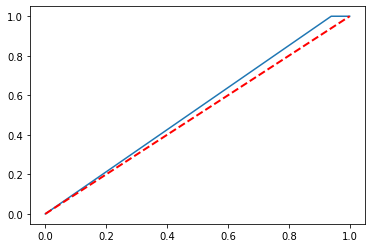

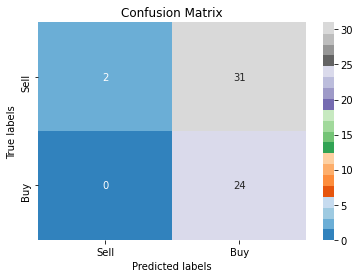

In [6]:
CNNClassifier(x_train,x_test, y_train, y_test)

## 2. GOOG

In [7]:
%%time
tck = 'GOOG'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 35.4 s


Inspect the size of the training and test set

In [8]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  152
Number of sell observations :  58
Number of buy observations :  94

--------Test set--------
Total number of observations:  71
Number of sell observations :  33
Number of buy observations :  38


CNN model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 10, 128)           87808     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 128)            82048     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               15480     
_________________________________________________________________
dense_4 (Dense)              (None, 80)               

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


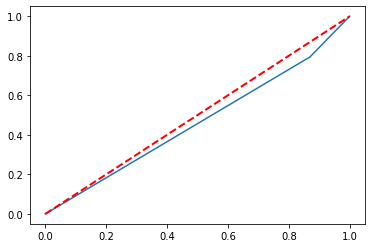

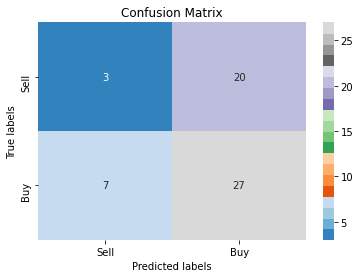

In [9]:
CNNClassifier(x_train,x_test, y_train, y_test)

## 3. FB

In [10]:
%%time
tck = 'FB'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 34.9 s


Inspect the size of the training and test set

In [11]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  152
Number of sell observations :  63
Number of buy observations :  89

--------Test set--------
Total number of observations:  71
Number of sell observations :  36
Number of buy observations :  35


CNN model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 10, 128)           87808     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1, 128)            82048     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               15480     
_________________________________________________________________
dense_7 (Dense)              (None, 80)               

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


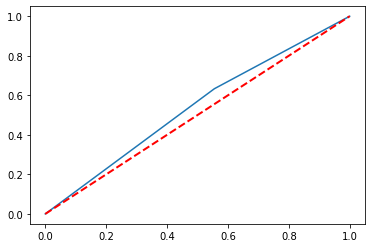

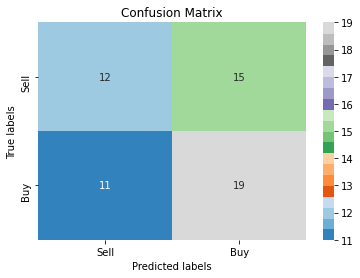

In [12]:
CNNClassifier(x_train,x_test, y_train, y_test)

## 4. AMZN

In [13]:
%%time
tck = 'AMZN'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 35.5 s


Inspect the size of the training and test set

In [14]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  152
Number of sell observations :  61
Number of buy observations :  91

--------Test set--------
Total number of observations:  71
Number of sell observations :  36
Number of buy observations :  35


CNN model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 10, 128)           87808     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1, 128)            82048     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               15480     
_________________________________________________________________
dense_10 (Dense)             (None, 80)               

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


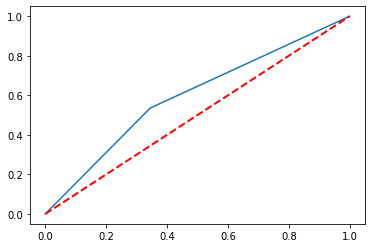

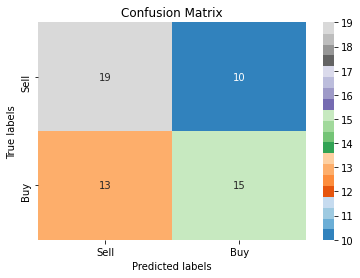

In [15]:
CNNClassifier(x_train,x_test, y_train, y_test)

## 5. NFLX

In [16]:
%%time
tck = 'NFLX'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 35.3 s


Inspect the size of the training and test set

In [17]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  151
Number of sell observations :  69
Number of buy observations :  82

--------Test set--------
Total number of observations:  71
Number of sell observations :  37
Number of buy observations :  34


CNN model

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 10, 128)           87808     
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 5, 128)            0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 1, 128)            82048     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 120)               15480     
_________________________________________________________________
dense_49 (Dense)             (None, 80)              

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


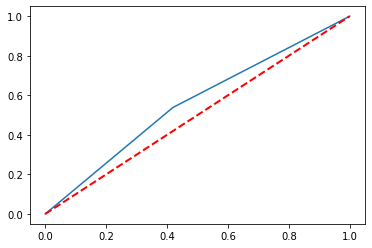

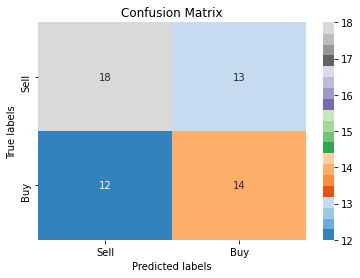

In [30]:
CNNClassifier(x_train,x_test, y_train, y_test)